In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   


In [2]:
df=pd.read_csv(r'C:\Users\purdi\Documents\proyecto_final\air-quality-politics\data\processed\data_clean.csv', sep=';', encoding='latin-1')

In [3]:
df=df[df['causa_de_muerte'].isin(['062-067  X.Enfermedades del sistema respiratorio', 'Enfermedad pulmonar obstructiva crónica', 'Neumonía y gripe', 'Cáncer de tráquea, bronquios y pulmón'])]

In [4]:
df.head()

,causa_de_muerte,sexo,provincias,mes,anio,muertes_por_causa,codigo_provincia,latitud_g,longitud_g,altitud,tipo_area,valor_ica,CATEGORIA_ICA,partido,poblacion,muertes_log,riesgo_ica,muertes_por_100k,clase_mortalidad
55286,062-067 X.Enfermedades del sistema respiratorio,Hombres,02 Albacete,1,2022,215.829980,2,38.9808,-1.8452,691.0,SUBURBANA,22.778847,Buena,PP,199208.0,5.379114,Riesgo_ICA_Medio,108.344032,media
55287,062-067 X.Enfermedades del sistema respiratorio,Hombres,02 Albacete,2,2022,155.548290,2,38.9808,-1.8452,691.0,SUBURBANA,20.110090,Razonablemente buena,PP,11435.0,5.053365,Riesgo_ICA_Medio,1360.282376,alta
55288,062-067 X.Enfermedades del sistema respiratorio,Hombres,02 Albacete,3,2022,178.692153,2,38.9808,-1.8452,691.0,SUBURBANA,26.769706,Buena,PP,10762.0,5.191245,Riesgo_ICA_Medio,1660.399116,alta
55289,062-067 X.Enfermedades del sistema respiratorio,Hombres,02 Albacete,4,2022,185.689135,2,38.9808,-1.8452,691.0,SUBURBANA,8.073927,Buena,PP,10089.0,5.229445,Riesgo_ICA_Bajo,1840.510802,alta
55290,062-067 X.Enfermedades del sistema respiratorio,Hombres,02 Albacete,5,2022,185.150905,2,38.9808,-1.8452,691.0,SUBURBANA,13.674748,Buena,PP,9415.0,5.226558,Riesgo_ICA_Bajo,1966.552368,alta


In [5]:
print(df.describe())

# Convertir columnas categóricas si hace falta
categorical_cols = ['causa_de_muerte', 'sexo', 'provincias', 'tipo_area', 'CATEGORIA_ICA', 'partido', 'clase_mortalidad', 'riesgo_ica']
for col in categorical_cols:
    df[col] = df[col].astype('category')

               mes         anio  muertes_por_causa  codigo_provincia  \
count  7898.000000  7898.000000        7898.000000       7898.000000   
mean      6.346670  2017.340593         252.186727         27.687263   
std       3.433716     2.777417         175.429969         14.364075   
min       1.000000  2013.000000           0.325167          2.000000   
25%       3.000000  2015.000000         130.785388         17.000000   
50%       6.000000  2017.000000         221.029792         28.000000   
75%       9.000000  2020.000000         321.728555         39.000000   
max      12.000000  2022.000000        1725.593274         51.000000   

         latitud_g   longitud_g      altitud    valor_ica     poblacion  \
count  7898.000000  7898.000000  7898.000000  7898.000000  7.898000e+03   
mean     40.521154    -3.258401   464.106563    15.904697  1.031810e+05   
std       2.777905     3.718268   300.845693     6.856748  3.367241e+05   
min      28.337737   -16.709137     1.000000     2.

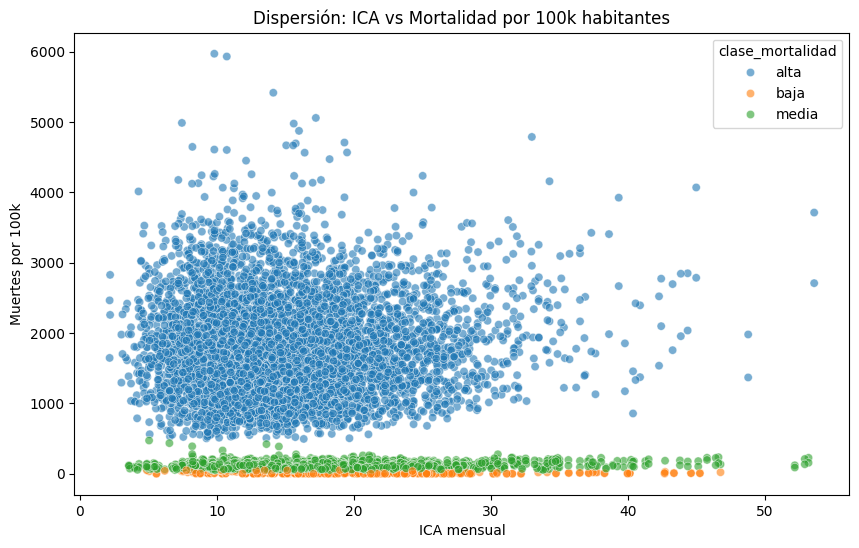

In [6]:
# Dispersión ICA vs muertes por 100k
plt.figure(figsize=(10,6))
sns.scatterplot(x='valor_ica', y='muertes_por_100k', hue='clase_mortalidad', data=df, alpha=0.6)
plt.title('Dispersión: ICA vs Mortalidad por 100k habitantes')
plt.xlabel('ICA mensual')
plt.ylabel('Muertes por 100k')
plt.show()


In [7]:
# Correlación Pearson
from scipy.stats import pearsonr

corr, pval = pearsonr(df['valor_ica'], df['muertes_por_100k'])
print(f"Correlación ICA vs muertes_por_100k: {corr:.3f}, p-valor: {pval:.4f}")


Correlación ICA vs muertes_por_100k: -0.126, p-valor: 0.0000


In [8]:
# Agrupamos por provincia y año para obtener medias anuales
df_anual = df.groupby(['codigo_provincia', 'anio']).agg({
    'valor_ica': 'mean',
    'muertes_por_100k': 'mean',
    'muertes_log': 'mean',
    'altitud': 'first',
    'poblacion': 'mean',
    'tipo_area': lambda x: x.mode()[0],
    'partido': lambda x: x.mode()[0],
    'riesgo_ica': lambda x: x.mode()[0],
    'CATEGORIA_ICA': lambda x: x.mode()[0]
}).reset_index()

# Visualizamos los primeros registros
df_anual.head()


,codigo_provincia,anio,valor_ica,muertes_por_100k,muertes_log,altitud,poblacion,tipo_area,partido,riesgo_ica,CATEGORIA_ICA
0,2,2013,20.325099,1282.637633,5.007802,691.0,42766.416667,SUBURBANA,PP,Riesgo_ICA_Bajo,Buena
1,2,2014,13.518290,1476.567004,5.211023,691.0,48845.150000,SUBURBANA,PP,Riesgo_ICA_Bajo,Buena
2,2,2015,18.615624,1774.118581,5.365165,691.0,42353.083333,SUBURBANA,PP,Riesgo_ICA_Bajo,Buena
3,2,2016,17.663945,1490.486375,5.160082,691.0,42271.041667,SUBURBANA,PP,Riesgo_ICA_Bajo,Buena
4,2,2017,20.087098,1804.799617,5.396406,691.0,42313.250000,SUBURBANA,PP,Riesgo_ICA_Bajo,Buena


In [9]:
from scipy.stats import pearsonr

# Correlación simple
corr, pval = pearsonr(df_anual['valor_ica'], df_anual['muertes_por_100k'])
print(f"Correlación anual ICA vs muertes/100k: {corr:.3f}, p-valor: {pval:.4f}")

# También puedes usar la columna logarítmica
corr_log, pval_log = pearsonr(df_anual['valor_ica'], df_anual['muertes_log'])
print(f"Correlación anual ICA vs muertes_log: {corr_log:.3f}, p-valor: {pval_log:.4f}")


Correlación anual ICA vs muertes/100k: -0.249, p-valor: 0.0000
Correlación anual ICA vs muertes_log: 0.094, p-valor: 0.0824


In [10]:
df_anual.groupby('riesgo_ica')['muertes_por_100k'].mean().sort_values(ascending=False)


C:\Users\purdi\AppData\Local\Temp\ipykernel_3596\366218095.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_anual.groupby('riesgo_ica')['muertes_por_100k'].mean().sort_values(ascending=False)


riesgo_ica
Riesgo_ICA_Bajo     1382.249823
Riesgo_ICA_Medio    1251.456458
Riesgo_ICA_Alto      779.249272
Name: muertes_por_100k, dtype: float64

C:\Users\purdi\AppData\Local\Temp\ipykernel_3596\4249141473.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_anual, x='riesgo_ica', y='muertes_por_100k', palette='coolwarm')


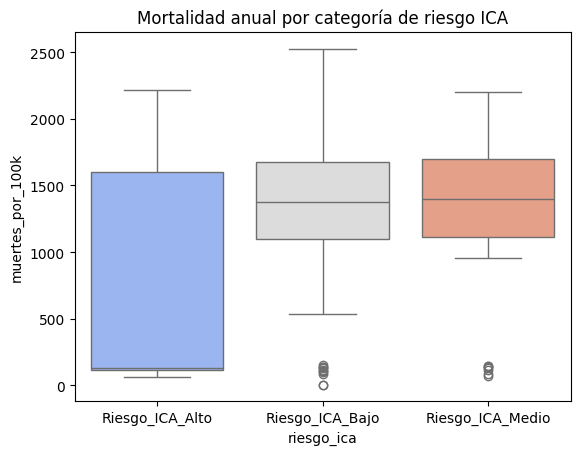

In [11]:
sns.boxplot(data=df_anual, x='riesgo_ica', y='muertes_por_100k', palette='coolwarm')
plt.title('Mortalidad anual por categoría de riesgo ICA')
plt.show()


Zonas con peor ICA (riesgo alto) podrían ser urbanas grandes, donde:

Hay más población joven, más servicios sanitarios, mejor infraestructura.

Hay menos mortalidad proporcional (poblaciones más sanas o con más atención médica).

La contaminación no impacta de forma inmediata en las cifras globales de mortalidad.

Zonas rurales o envejecidas pueden tener:

Mejor calidad del aire (ICA bajo)

Pero más mortalidad por envejecimiento, enfermedades crónicas no tratadas, despoblación…

La clasificación de riesgo_ica tal vez no representa bien la exposición real o acumulada, o tal vez:

El número de provincias en "Riesgo_ICA_Alto" es muy bajo, distorsionando los promedios.

La clasificación es mensual, pero los efectos pueden ser acumulativos o de largo plazo.

In [12]:
df_anual['riesgo_ica'].value_counts()


riesgo_ica
Riesgo_ICA_Bajo     301
Riesgo_ICA_Medio     35
Riesgo_ICA_Alto       8
Name: count, dtype: int64

In [15]:
df_anual[df_anual['riesgo_ica'] == 'Riesgo_ICA_Alto'][['codigo_provincia', 'anio', 'valor_ica', 'muertes_por_100k', 'tipo_area', 'poblacion']]


,codigo_provincia,anio,valor_ica,muertes_por_100k,tipo_area,poblacion
40,8,2013,33.083623,112.405430,SUBURBANA,586150.625000
41,8,2014,32.464423,116.199613,SUBURBANA,582126.916667
42,8,2015,33.943205,128.800788,SUBURBANA,581480.958333
43,8,2016,30.777361,124.960408,SUBURBANA,584346.875000
44,8,2017,32.087630,59.437421,SUBURBANA,589442.791667
74,16,2017,29.580979,2213.292505,SUBURBANA,22577.958333
76,16,2019,33.356905,2017.783540,SUBURBANA,22440.041667
103,19,2016,26.843084,1461.114469,RURAL,27308.541667


In [25]:
X['tipo_area_SUBURBANA'] = X['tipo_area_SUBURBANA'].astype(int)
X['tipo_area_URBANA'] = X['tipo_area_URBANA'].astype(int)


In [26]:
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       muertes_por_100k   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     74.04
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.39e-58
Time:                        12:56:54   Log-Likelihood:                -2475.0
No. Observations:                 344   AIC:                             4964.
Df Residuals:                     337   BIC:                             4991.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.611e+04   1

In [21]:
df_edad=pd.read_csv(r'C:\Users\purdi\Documents\proyecto_final\Maria_Pais_proyecto_final_ICA_gestion_politica\data\processed\resultado_union_edad9_limpio_2013.csv', sep=',')

In [22]:
df_edad.head()

,Sexo,Grupo9Edad,Codigo_Provincia,Anio,Mes,Total,Tasa_mortalidad_por_1000,Total_causa,VALOR_ICA,CATEGORIA_ICA
0,Hombres,0-4,1,2013,1,8765.375227,4.24,320.0,18.072880,Buena
1,Hombres,0-4,1,2013,2,8765.375227,4.24,320.0,20.010898,Buena
2,Hombres,0-4,1,2013,3,8765.375227,4.24,320.0,17.505720,Buena
3,Hombres,0-4,1,2013,4,8765.375227,4.24,320.0,16.543407,Buena
4,Hombres,0-4,1,2013,5,8765.375227,4.24,320.0,14.922609,Buena


  Grupo9Edad  corr_ica_mortalidad
0        0-4             0.029743
1      15-24            -0.003435
2      25-34            -0.020250
3      35-44            -0.028219
4      45-54             0.012706
5       5-14            -0.032881
6      55-64            -0.011613
7      65-74             0.008372
8        75+             0.047016


C:\Users\purdi\AppData\Local\Temp\ipykernel_3596\3177244590.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrs = df_edad.groupby('Grupo9Edad').apply(


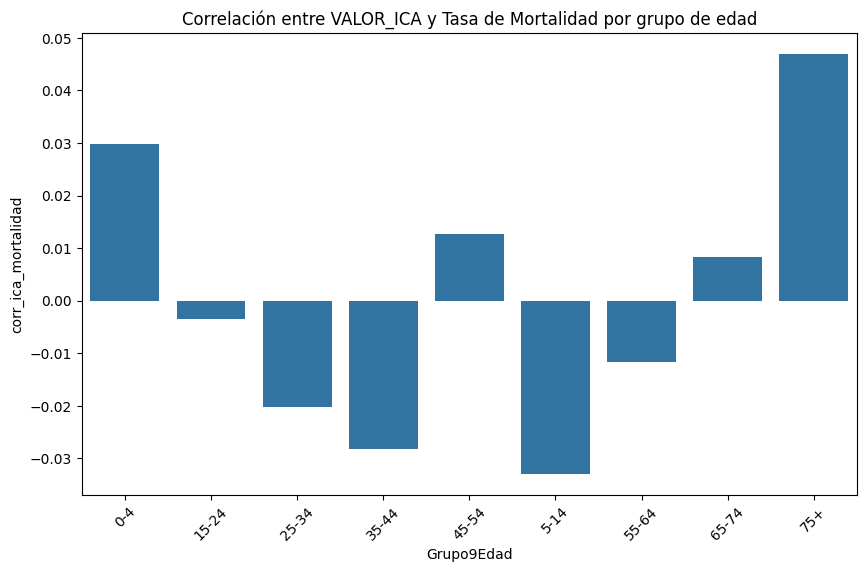

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar por grupo de edad y calcular correlación ICA - tasa mortalidad
corrs = df_edad.groupby('Grupo9Edad').apply(
    lambda g: g['VALOR_ICA'].corr(g['Tasa_mortalidad_por_1000'])
).reset_index().rename(columns={0:'corr_ica_mortalidad'})

print(corrs)

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(data=corrs, x='Grupo9Edad', y='corr_ica_mortalidad')
plt.title('Correlación entre VALOR_ICA y Tasa de Mortalidad por grupo de edad')
plt.xticks(rotation=45)
plt.show()


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Suponiendo que X es tu dataframe con variables predictoras (ya con constante incluida)
# Si no tiene constante, agrégala:
import statsmodels.api as sm
if 'const' not in X.columns:
    X = sm.add_constant(X, has_constant='add')

# Calculamos VIF para cada variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns

# El VIF se calcula con los valores numéricos, asegurate que no hay variables categóricas sin codificar
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


              Variable            VIF
0                const  518917.199735
1            valor_ica       1.620611
2            poblacion       1.304815
3                 anio       1.052835
4              altitud       1.094849
5  tipo_area_SUBURBANA       1.697228
6     tipo_area_URBANA       1.557985


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['valor_ica', 'poblacion', 'anio', 'altitud']
X_scaled = X.copy()
X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])


In [29]:
from statsmodels.stats.stattools import durbin_watson

model = sm.OLS(y, X_scaled).fit()
dw = durbin_watson(model.resid)
print(f'Durbin-Watson: {dw}')


Durbin-Watson: 0.7253472539475588




El VIF muestra que ninguna variable presenta multicolinealidad preocupante (todos están muy por debajo de 5), excepto la constante que tiene un VIF muy alto, pero eso es normal y no representa problema.

Entonces, la alta condición numérica (Condition Number) que viste antes puede deberse a otras causas como:

Escalas muy distintas entre variables (por ejemplo, población muy grande vs. años)

Algún problema numérico puntual o colinealidad muy sutil

Datos poco variados o distribución muy sesgada

El valor de Durbin-Watson alrededor de 0.72 indica presencia de autocorrelación positiva en los residuos del modelo (idealmente debería estar cerca de 2 para no tener autocorrelación).

Esto significa que:

Las observaciones cercanas en el tiempo (meses, años) tienen residuos correlacionados.

La suposición de independencia de errores del modelo OLS se está violando.

El modelo puede no estar capturando bien la estructura temporal o espacial.

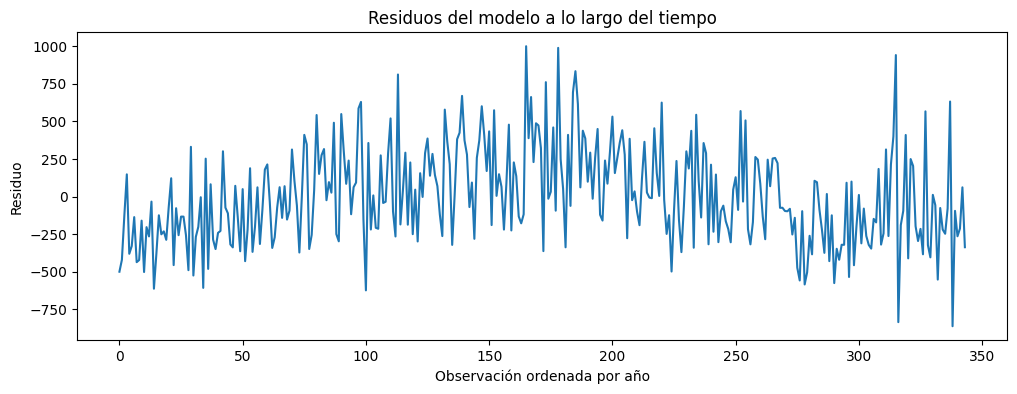

In [31]:
df_anual_model = df_anual.copy()
df_anual_model['residuos'] = residuos.values
df_anual_model = df_anual_model.sort_values('anio')

plt.figure(figsize=(12, 4))
plt.plot(df_anual_model['residuos'].values)
plt.title('Residuos del modelo a lo largo del tiempo')
plt.xlabel('Observación ordenada por año')
plt.ylabel('Residuo')
plt.show()


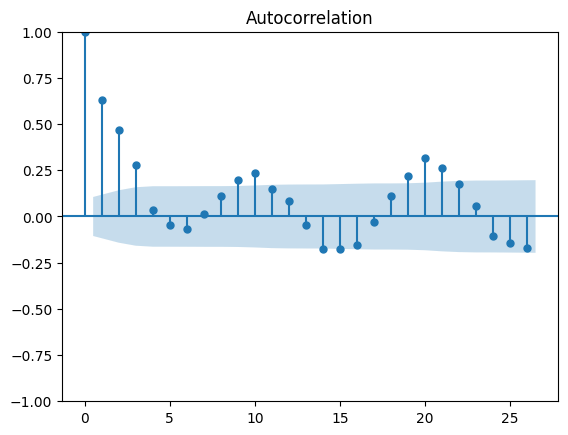

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuos)
plt.show()


Este es un gráfico de autocorrelación (también llamado correlograma). Sirve para analizar cuánto se relacionan los valores de una serie temporal con sus propios valores en el pasado (en distintos desfases o "lags").

Interpretación del gráfico:
Desfase 0 (Lag 0):

Siempre tiene un valor de autocorrelación de 1.0, porque es la serie comparada consigo misma.

Desfases 1 a 3:

Muestran autocorrelaciones positivas altas, lo que indica que hay una fuerte relación temporal: los valores pasados influyen en los futuros.

Resto de los desfases:

Las barras van oscilando (algunas positivas, otras negativas) y la mayoría están dentro del área sombreada azul, que representa el intervalo de confianza del 95%.



ARIMA

In [37]:
df['fecha'] = pd.to_datetime(
    df[['anio', 'mes']].rename(columns={'anio': 'year', 'mes': 'month'}).assign(day=1)
)


In [39]:
df['fecha'] = pd.to_datetime(dict(year=df['anio'], month=df['mes'], day=1))


In [40]:
df.head()

,causa_de_muerte,sexo,provincias,mes,anio,muertes_por_causa,codigo_provincia,latitud_g,longitud_g,altitud,tipo_area,valor_ica,CATEGORIA_ICA,partido,poblacion,muertes_log,riesgo_ica,muertes_por_100k,clase_mortalidad,fecha
55286,062-067 X.Enfermedades del sistema respiratorio,Hombres,02 Albacete,1,2022,215.829980,2,38.9808,-1.8452,691.0,SUBURBANA,22.778847,Buena,PP,199208.0,5.379114,Riesgo_ICA_Medio,108.344032,media,2022-01-01
55287,062-067 X.Enfermedades del sistema respiratorio,Hombres,02 Albacete,2,2022,155.548290,2,38.9808,-1.8452,691.0,SUBURBANA,20.110090,Razonablemente buena,PP,11435.0,5.053365,Riesgo_ICA_Medio,1360.282376,alta,2022-02-01
55288,062-067 X.Enfermedades del sistema respiratorio,Hombres,02 Albacete,3,2022,178.692153,2,38.9808,-1.8452,691.0,SUBURBANA,26.769706,Buena,PP,10762.0,5.191245,Riesgo_ICA_Medio,1660.399116,alta,2022-03-01
55289,062-067 X.Enfermedades del sistema respiratorio,Hombres,02 Albacete,4,2022,185.689135,2,38.9808,-1.8452,691.0,SUBURBANA,8.073927,Buena,PP,10089.0,5.229445,Riesgo_ICA_Bajo,1840.510802,alta,2022-04-01
55290,062-067 X.Enfermedades del sistema respiratorio,Hombres,02 Albacete,5,2022,185.150905,2,38.9808,-1.8452,691.0,SUBURBANA,13.674748,Buena,PP,9415.0,5.226558,Riesgo_ICA_Bajo,1966.552368,alta,2022-05-01


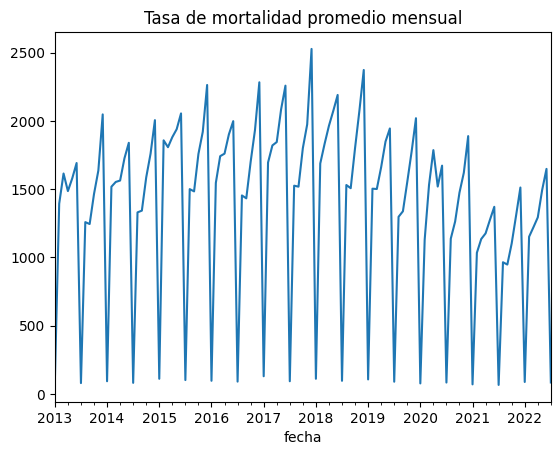

c:\Users\purdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\purdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\purdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       muertes_por_100k   No. Observations:                  115
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -903.128
Date:                Mon, 16 Jun 2025   AIC                           1812.256
Time:                        13:21:31   BIC                           1820.464
Sample:                    01-01-2013   HQIC                          1815.587
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1335      0.185     -0.720      0.471      -0.497       0.230
ma.L1         -0.9367      0.051    -18.324      0.000      -1.037      -0.837
sigma2      4.339e+05   8.35e+04      5.199      0.0

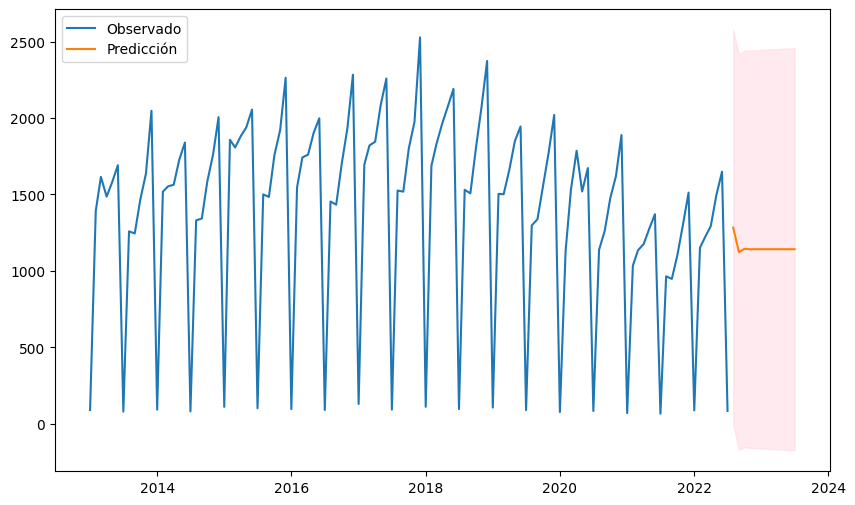

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Supongamos que df es tu dataframe con la columna 'fecha' ya creada.

# Agrupar por fecha y calcular la media mensual de muertes por 100k
serie = df.groupby('fecha')['muertes_por_100k'].mean().sort_index()

# Visualizar la serie
serie.plot(title='Tasa de mortalidad promedio mensual')
plt.show()

# Definir modelo ARIMA (p,d,q) - ejemplo: ARIMA(1,1,1)
modelo = ARIMA(serie, order=(1,1,1))

# Ajustar modelo
resultado = modelo.fit()

# Resumen del modelo
print(resultado.summary())

# Hacer predicciones (por ejemplo, 12 meses hacia adelante)
predicciones = resultado.get_forecast(steps=12)
pred_ci = predicciones.conf_int()

# Visualizar predicciones
plt.figure(figsize=(10,6))
plt.plot(serie, label='Observado')
plt.plot(predicciones.predicted_mean.index, predicciones.predicted_mean, label='Predicción')
plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()


In [42]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')  # para evitar mensajes molestos

# Tu serie temporal: asegurate que sea un pd.Series con índice datetime
serie = df.groupby('fecha')['muertes_por_100k'].mean()

# Probar distintas combinaciones de (p,d,q)
import itertools

p = d = q = range(0, 3)  # prueba valores 0,1,2
pdq = list(itertools.product(p, d, q))

best_aic = float('inf')
best_order = None
best_model = None

for order in pdq:
    try:
        model = ARIMA(serie, order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results
    except:
        continue

print(f'Mejor modelo ARIMA{best_order} con AIC: {best_aic}')
print(best_model.summary())


Mejor modelo ARIMA(2, 0, 2) con AIC: 1788.1646869451108
                               SARIMAX Results                                
Dep. Variable:       muertes_por_100k   No. Observations:                  115
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -888.082
Date:                Mon, 16 Jun 2025   AIC                           1788.165
Time:                        13:23:51   BIC                           1804.634
Sample:                    01-01-2013   HQIC                          1794.850
                         - 07-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1374.6570     68.750     19.995      0.000    1239.910    1509.404
ar.L1          1.0052      0.013     79.465      0.000       0.980       1.

SARIMA (12 MESES -ESTACIONALIDAD)

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Definir rango para parámetros estacionales (P, D, Q)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = float('inf')
best_order = None
best_seasonal_order = None
best_model = None

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(serie,
                            order=order,
                            seasonal_order=seasonal_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_seasonal_order = seasonal_order
                best_model = results
        except:
            continue

print(f'Mejor modelo SARIMA{best_order}x{best_seasonal_order}12 con AIC: {best_aic}')
print(best_model.summary())


Mejor modelo SARIMA(0, 2, 2)x(1, 2, 2, 12)12 con AIC: 12.0
                                     SARIMAX Results                                      
Dep. Variable:                   muertes_por_100k   No. Observations:                  115
Model:             SARIMAX(0, 2, 2)x(1, 2, 2, 12)   Log Likelihood                   0.000
Date:                            Mon, 16 Jun 2025   AIC                             12.000
Time:                                    13:30:53   BIC                             24.763
Sample:                                01-01-2013   HQIC                            17.011
                                     - 07-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         47.2604         -0       -inf      0.000 

In [44]:
import warnings
import itertools
import statsmodels.api as sm

warnings.filterwarnings("ignore")

# Supongamos que tu serie temporal se llama 'serie', indexada por fecha mensual
# Ejemplo: serie = df.groupby('fecha')['muertes_por_100k'].mean()

# Definimos rangos para p, q, P, Q pequeños para evitar modelos muy complejos
p = q = range(0, 3)
d = 1
P = Q = range(0, 2)
D = 1
s = 12  # estacionalidad anual mensual

# Generamos todas las combinaciones posibles para p,q,P,Q
param_grid = list(itertools.product(p, q))
param_seasonal_grid = list(itertools.product(P, Q))

mejor_aic = float('inf')
mejor_modelo = None
mejores_param = None

for param in param_grid:
    for param_seasonal in param_seasonal_grid:
        try:
            modelo = sm.tsa.statespace.SARIMAX(
                serie,
                order=(param[0], d, param[1]),
                seasonal_order=(param_seasonal[0], D, param_seasonal[1], s),
                enforce_stationarity=False,
                enforce_invertibility=False
            ).fit(disp=False)
            
            if modelo.aic < mejor_aic:
                mejor_aic = modelo.aic
                mejor_modelo = modelo
                mejores_param = (param, param_seasonal)
        except:
            continue

print(f'Mejor modelo SARIMA{mejores_param}x{(mejores_param[1][0], D, mejores_param[1][1], s)} con AIC: {mejor_aic}')
print(mejor_modelo.summary())


Mejor modelo SARIMA((2, 2), (1, 1))x(1, 1, 1, 12) con AIC: 1113.1306226690367
                                      SARIMAX Results                                       
Dep. Variable:                     muertes_por_100k   No. Observations:                  115
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -549.565
Date:                              Mon, 16 Jun 2025   AIC                           1113.131
Time:                                      13:35:19   BIC                           1130.392
Sample:                                  01-01-2013   HQIC                          1120.081
                                       - 07-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.040

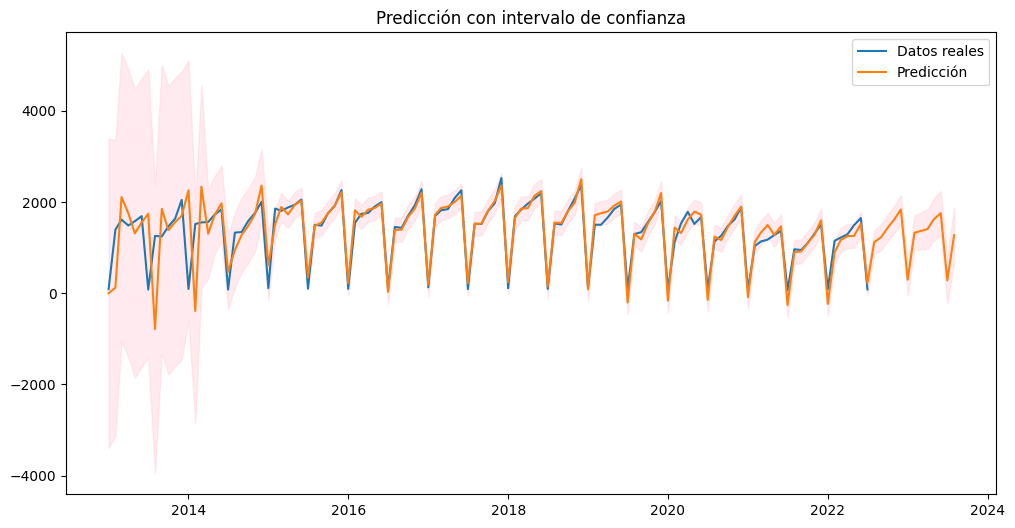

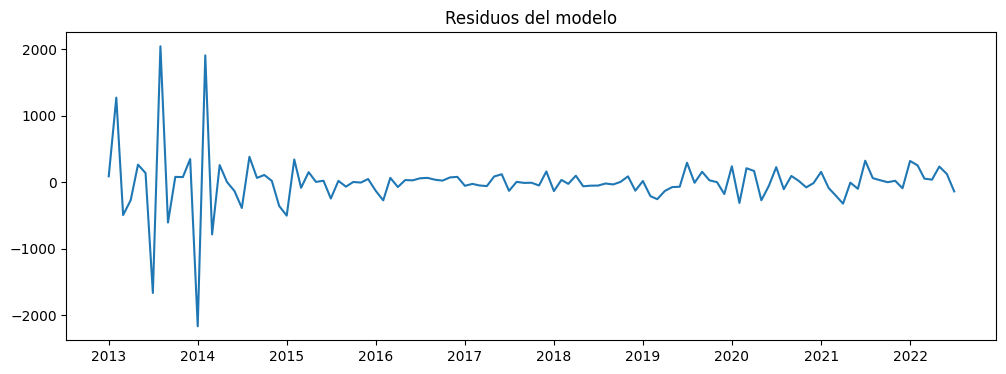

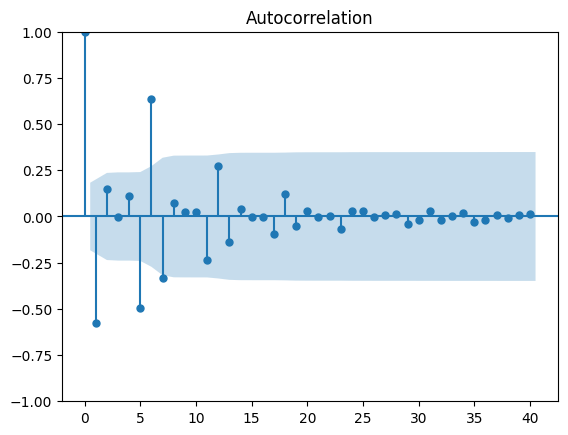

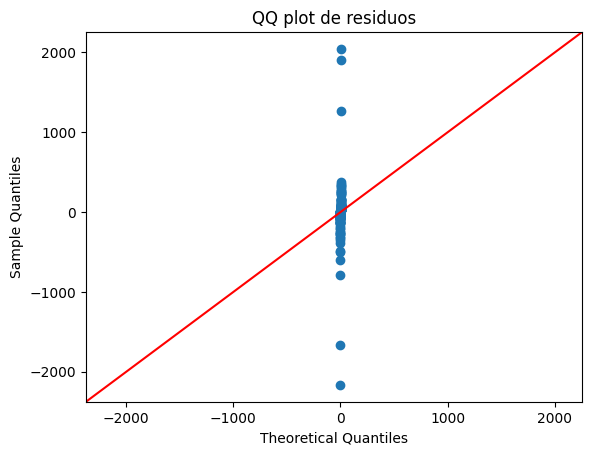

In [45]:
import matplotlib.pyplot as plt

# Predicciones en muestra y forecast a futuro (12 meses)
pred = mejor_modelo.get_prediction(start=0, end=len(serie)+12)
pred_ci = pred.conf_int()

plt.figure(figsize=(12,6))
plt.plot(serie.index, serie, label='Datos reales')
plt.plot(pred.predicted_mean.index, pred.predicted_mean, label='Predicción')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Predicción con intervalo de confianza')
plt.show()

# Residuos
residuos = mejor_modelo.resid

plt.figure(figsize=(12,4))
plt.plot(residuos)
plt.title('Residuos del modelo')
plt.show()

# ACF de residuos
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuos, lags=40)
plt.show()

# QQ plot para normalidad de residuos
import scipy.stats as stats
import statsmodels.api as sm

sm.qqplot(residuos, line='45')
plt.title('QQ plot de residuos')
plt.show()


Ajuste del modelo:

A partir de 2014 en adelante, el modelo predice bastante bien, ya que la línea naranja (predicción) sigue de cerca a la azul (datos reales).

El modelo captura correctamente la estacionalidad anual, repitiendo los picos y valles de cada año.

Intervalo de confianza:

Al inicio (2013-2014), el intervalo es muy amplio, lo que indica alta incertidumbre al principio (posiblemente por falta de datos previos).

Con el tiempo, el intervalo se estrecha, lo cual es buena señal: el modelo gana confianza conforme tiene más datos para ajustar.

Pronóstico hacia 2023-2024:

Aunque el modelo sigue bien la forma estacional, se nota que el intervalo vuelve a ensancharse ligeramente, lo cual es normal cuando se predice hacia el futuro.

PREDICCION A 10 MESES

In [48]:
# Filtrar datos para una provincia específica
provincia = '02 Albacete'
df_prov = df[df['provincias'] == provincia]

# Crear serie temporal con índice fecha y variable muertes_por_100k
serie_prov = df_prov.set_index('fecha')['muertes_por_100k'].sort_index()

# Ajustar modelo SARIMA para esta provincia (puedes usar parámetros que ya seleccionaste)
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo_prov = SARIMAX(serie_prov, order=(2,1,2), seasonal_order=(1,1,1,12))
resultado_prov = modelo_prov.fit(disp=False)

# Predecir los próximos 10 meses
pred_prov = resultado_prov.get_forecast(steps=10)
pred_ci_prov = pred_prov.conf_int()

print(pred_prov.predicted_mean)  # Aquí están los valores pronosticados de muertes_por_100k


226     858.279133
227    1147.252093
228     992.317581
229    1184.855532
230    1081.359809
231    1449.754277
232    1280.747593
233    1241.564167
234    1410.429804
235    1604.689711
Name: predicted_mean, dtype: float64
